## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# boston = datasets.load_boston()
# X = pd.DataFrame(boston.data, columns = boston.feature_names)
# y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [29]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)
even_lines = boston.loc[boston.index % 2 == 0].reset_index(drop=True)
odd_lines = boston.loc[boston.index % 2 == 1].drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1).reset_index(drop=True)

boston = even_lines.merge(odd_lines, how="left", left_index=True, right_index=True)
boston.columns = columns
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [30]:
X = boston.drop(["MEDV"], axis=1)
y = boston["MEDV"]

In [31]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [33]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
modelo = DecisionTreeRegressor(max_depth=8)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [36]:
path = modelo.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.41242938e-05, 1.41242938e-05, 4.23728814e-05,
        2.25988701e-04, 2.25988701e-04, 3.53107345e-04, 3.53107345e-04,
        5.08474576e-04, 6.77966102e-04, 6.77966102e-04, 6.77966102e-04,
        9.03954802e-04, 9.22787194e-04, 1.05932203e-03, 1.70903955e-03,
        1.70903955e-03, 2.03389831e-03, 2.26224105e-03, 3.17796610e-03,
        3.17796610e-03, 3.17796610e-03, 3.38983051e-03, 3.75000000e-03,
        4.08192090e-03, 5.12711864e-03, 5.59624697e-03, 9.11487759e-03,
        9.96233522e-03, 1.18714689e-02, 1.35734463e-02, 1.38115416e-02,
        1.43220339e-02, 1.49491525e-02, 1.53813559e-02, 1.55720339e-02,
        1.78177966e-02, 1.83241525e-02, 2.08003766e-02, 2.13359228e-02,
        2.20423729e-02, 2.35502982e-02, 2.37335217e-02, 2.70520031e-02,
        3.39254327e-02, 3.56355932e-02, 3.97245763e-02, 4.21428571e-02,
        4.21999658e-02, 4.91666667e-02, 5.17376020e-02, 5.32419408e-02,
        5.46296296e-02, 5.65801233e-02, 5.96751412

Text(0, 0.5, 'Impureza total das folhas')

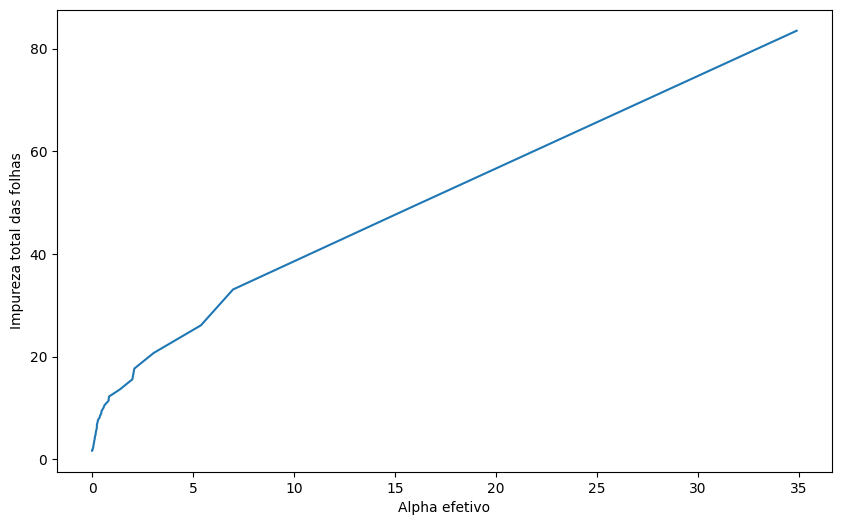

In [37]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [38]:
modelos = []
for ccp in ccp_alphas:
    modelo = DecisionTreeRegressor(ccp_alpha=ccp)
    modelo.fit(X_train, y_train)
    modelos.append(modelo)


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [47]:
mses=[]
for modelo in modelos:
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    print(f"---Modelo com ALPHA {modelo.ccp_alpha} ||| MSE: {mse}")

---Modelo com ALPHA 0.0 ||| MSE: 24.34434210526316
---Modelo com ALPHA 1.4124293785297888e-05 ||| MSE: 23.026694078947372
---Modelo com ALPHA 1.412429378529789e-05 ||| MSE: 21.63700657894737
---Modelo com ALPHA 4.237288135910516e-05 ||| MSE: 23.039272660818717
---Modelo com ALPHA 0.00022598870056460564 ||| MSE: 24.76854349415205
---Modelo com ALPHA 0.00022598870056500707 ||| MSE: 21.44066520467836
---Modelo com ALPHA 0.00035310734463228665 ||| MSE: 26.293556286549713
---Modelo com ALPHA 0.00035310734463276836 ||| MSE: 24.564084429824565
---Modelo com ALPHA 0.0005084745762711254 ||| MSE: 22.65490327119883
---Modelo com ALPHA 0.0006779661016948605 ||| MSE: 26.3715283625731
---Modelo com ALPHA 0.0006779661016948607 ||| MSE: 23.93876885964912
---Modelo com ALPHA 0.0006779661016953425 ||| MSE: 21.190998684210523
---Modelo com ALPHA 0.0009039548022597071 ||| MSE: 21.856581359649123
---Modelo com ALPHA 0.0009227871939810649 ||| MSE: 22.026740186403508
---Modelo com ALPHA 0.001059322033898546 

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Text(0, 0.5, 'MSE')

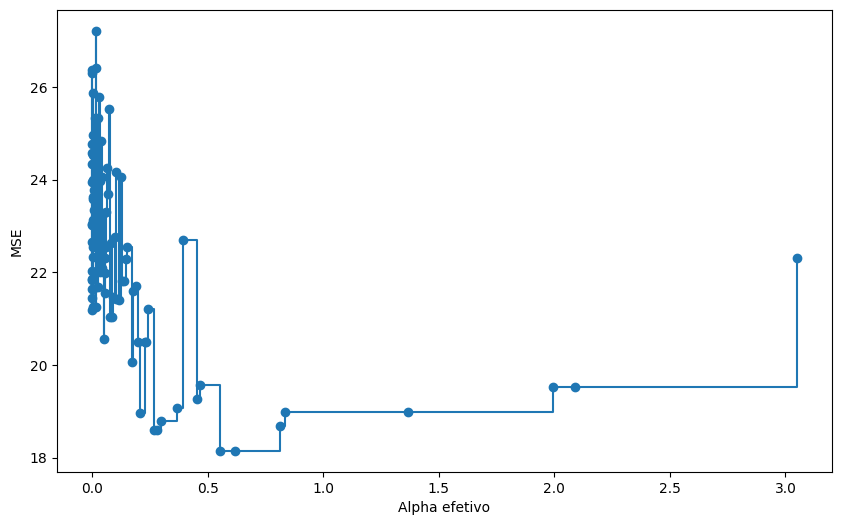

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-4], mses[:-4], marker='o', drawstyle="steps-post")
plt.xlabel("Alpha efetivo")
plt.ylabel("MSE")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [53]:
nova_arvore = DecisionTreeRegressor(ccp_alpha=0.6)
nova_arvore.fit(X_train, y_train)
nova_arvore.score(X_test, y_test)

0.7904758407319619

### 7. Visualize esta árvore.

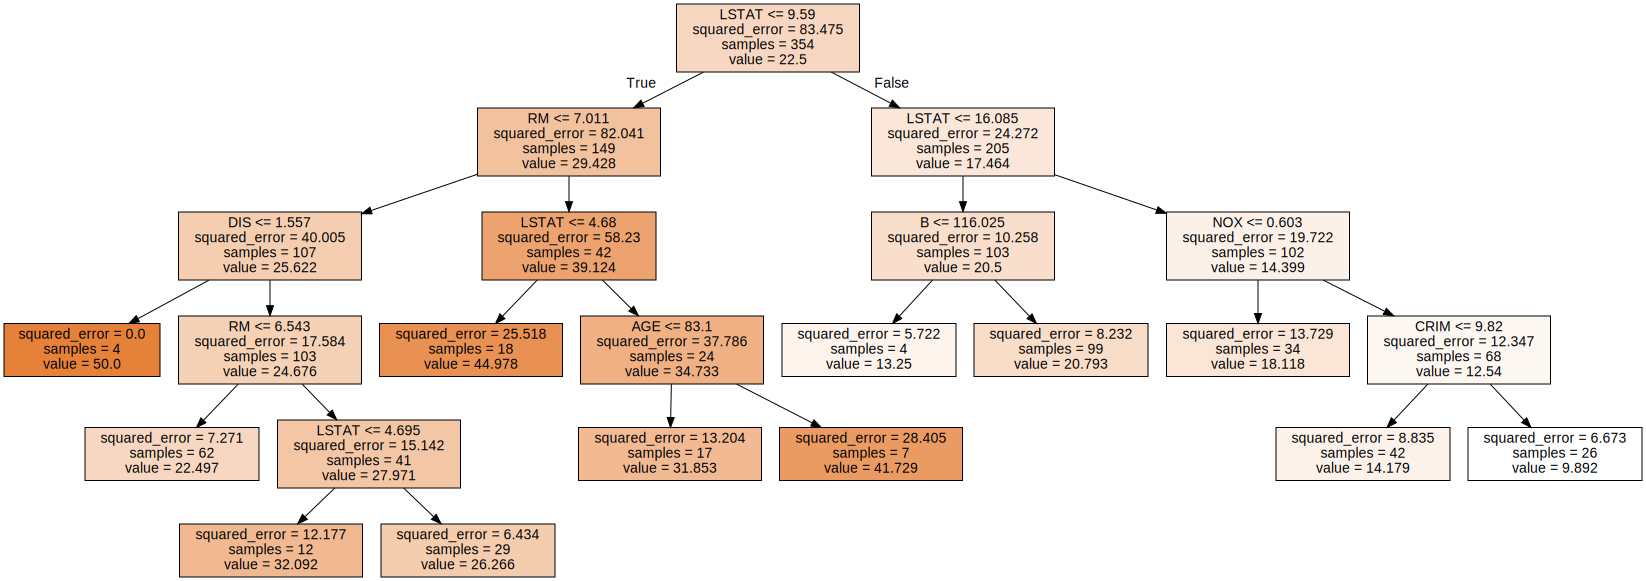

In [54]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(nova_arvore, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph